# Sevendi Eldrige Rifki Poluan🔥🔥🔥
### Descriptions: Computer Vision Fundamental

In [3]:
# working environment
!nvidia-smi

Sun Apr  9 10:42:20 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090         On | 00000000:65:00.0 Off |                  N/A |
|  0%   43C    P8               38W / 390W|    852MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## <font color='red'>Import the necessary libraries</font>

In [1]:
import tensorflow as tf
import os
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt 
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

2023-04-09 19:03:53.027184: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-09 19:03:53.064106: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
tf.__version__

'2.12.0'

In [4]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## <font color='red'>Download the Food-101 Data Set, which is a challenging data set containing 101 food categories and a total of 101,000 images. For detailed information about the dataset, you can refer to the author's [webpage](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/).</font>

In [8]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2023-04-06 08:12:43--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2023-04-06 08:12:44--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  5.27MB/s    in 15m 45s 

2023-04-06 08:28:30 (5.04 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [10]:
!ls food-101.tar.gz

food-101.tar.gz


In [20]:
!tar -xf food-101.tar.gz

In [21]:
!ls food-101

README.txt  images  license_agreement.txt  meta


In [22]:
!ls food-101/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheese_plate	    grilled_salmon	     risotto
cheesecake	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [5]:
ds_meta = [{"name": x, "total": len(os.listdir(f"food-101/images/{x}"))} for x in os.listdir("food-101/images")]

In [6]:
ds_meta

[{'name': 'lasagna', 'total': 1000},
 {'name': 'scallops', 'total': 1000},
 {'name': 'ravioli', 'total': 1000},
 {'name': 'sashimi', 'total': 1000},
 {'name': 'hot_and_sour_soup', 'total': 1000},
 {'name': 'sushi', 'total': 1000},
 {'name': 'shrimp_and_grits', 'total': 1000},
 {'name': 'waffles', 'total': 1000},
 {'name': 'chicken_wings', 'total': 1000},
 {'name': 'crab_cakes', 'total': 1000},
 {'name': 'poutine', 'total': 1000},
 {'name': 'french_toast', 'total': 1000},
 {'name': 'filet_mignon', 'total': 1000},
 {'name': 'pad_thai', 'total': 1000},
 {'name': 'miso_soup', 'total': 1000},
 {'name': 'pancakes', 'total': 1000},
 {'name': 'beignets', 'total': 1000},
 {'name': 'caesar_salad', 'total': 1000},
 {'name': 'hamburger', 'total': 1000},
 {'name': 'croque_madame', 'total': 1000},
 {'name': 'oysters', 'total': 1000},
 {'name': 'french_onion_soup', 'total': 1000},
 {'name': 'ceviche', 'total': 1000},
 {'name': 'beef_carpaccio', 'total': 1000},
 {'name': 'deviled_eggs', 'total': 1000}

## <font color='red'>Load and preprocess the dataset in preparation for training and testing.</font>

In [3]:
CLASS_NAMES = os.listdir("food-101/images")
IMG_SIZE = [224, 224]
BATCH_SIZE = 32

In [4]:
training = tf.keras.preprocessing.image_dataset_from_directory("food-101/images",
                                                       class_names=CLASS_NAMES,
                                                       label_mode="int",
                                                       image_size=IMG_SIZE,
                                                       shuffle=True,
                                                       seed=42,
                                                       validation_split=0.25,
                                                       subset="training",
                                                       batch_size=None) 
validation = tf.keras.preprocessing.image_dataset_from_directory("food-101/images",
                                                       class_names=CLASS_NAMES,
                                                       label_mode="int",
                                                       image_size=IMG_SIZE,
                                                       shuffle=True,
                                                       seed=42,
                                                       validation_split=0.25,
                                                       subset="validation",
                                                       batch_size=None) 

Found 101000 files belonging to 101 classes.
Using 75750 files for training.


2023-04-09 19:04:20.362608: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22024 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:65:00.0, compute capability: 8.6


Found 101000 files belonging to 101 classes.
Using 25250 files for validation.


In [6]:
len(training), len(validation)

(75750, 25250)

## <font color='red'>Display a sample image from the training dataset.</font>

2023-04-09 13:18:41.706043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [75750]
	 [[{{node Placeholder/_0}}]]
2023-04-09 13:18:41.706498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [75750]
	 [[{{node Placeholder/_4}}]]
2023-04-09 13:18:51.814946: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 662 of 1024
2023-04-09 13:18:56.892804: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


CHEESECAKE


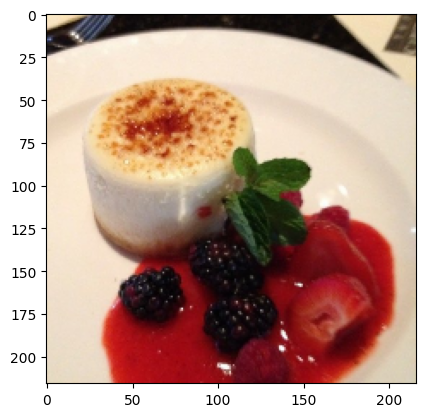

In [5]:
for x, y in training.take(1):  
    print(CLASS_NAMES[y.numpy()].upper())
    plt.imshow(np.uint8(x.numpy()))
    break

In [7]:
def func(img, lbl):
    # img = img * (1. / 255.) 
    # img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, dtype=tf.float32)
    return img, lbl

In [8]:
train = training.map(func, tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE).cache() 
test = validation.map(func, tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

## <font color='red'>In this step, I will design a basic model architecture to train the dataset. I will employ transfer learning by utilizing a pre-trained model from the ImageNet dataset, specifically the EfficientNetB0 model. To do this, I will freeze all the layers of the EfficientNetB0 model up to the last 7 layers, allowing only the last 7 layers to be trainable. Here's how it will be implemented.</font>
    
    In order to accelerate the training process, I have enabled mixed precision in this environment. This is possible because the GPU I am working on supports this feature, and I will make use of its resources.
    
    It's important to note that when using mixed precision, the output needs to be in tf.float32 format.

In [9]:
tf.keras.mixed_precision.set_global_policy(policy="mixed_float16") 
tf.keras.mixed_precision.global_policy()

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3090, compute capability 8.6


<Policy "mixed_float16">

In [9]:
def create_model():
    EfficientNet = tf.keras.applications.EfficientNetB0(include_top=False) # default weights='imagenet'
    
    for layer in EfficientNet.layers[:-7]:
        layer.trainable = False
        
    segment = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomHeight(0.2),
        tf.keras.layers.RandomWidth(0.2),
        tf.keras.layers.RandomZoom(0.2)
    ])
    
    inputs = tf.keras.layers.Input(shape=IMG_SIZE + [3])
    x = segment(inputs)
    x = EfficientNet(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D(name="g_avg_pool")(x)  
    x = tf.keras.layers.Dense(len(CLASS_NAMES))(x)
    outputs = tf.keras.layers.Activation(activation="softmax", dtype=tf.float32)(x)
    model_basic = tf.keras.Model(inputs, outputs)
    
    model_basic.compile(loss="sparse_categorical_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])
    
    return model_basic

In [10]:
model_basic = create_model()
model_basic.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 g_avg_pool (GlobalAveragePo  (None, 1280)             0         
 oling2D)                                                        
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 activation (Activation)     (None, 101)               0         
                                                             

## <font color='red'>Define callbacks for updating the learning rate and early stopping if the model does not show improvement.</font>
    
       In this case, I have designed a custom function for saving weights to address some errors encountered in the original TensorFlow library that require fixing.
       
   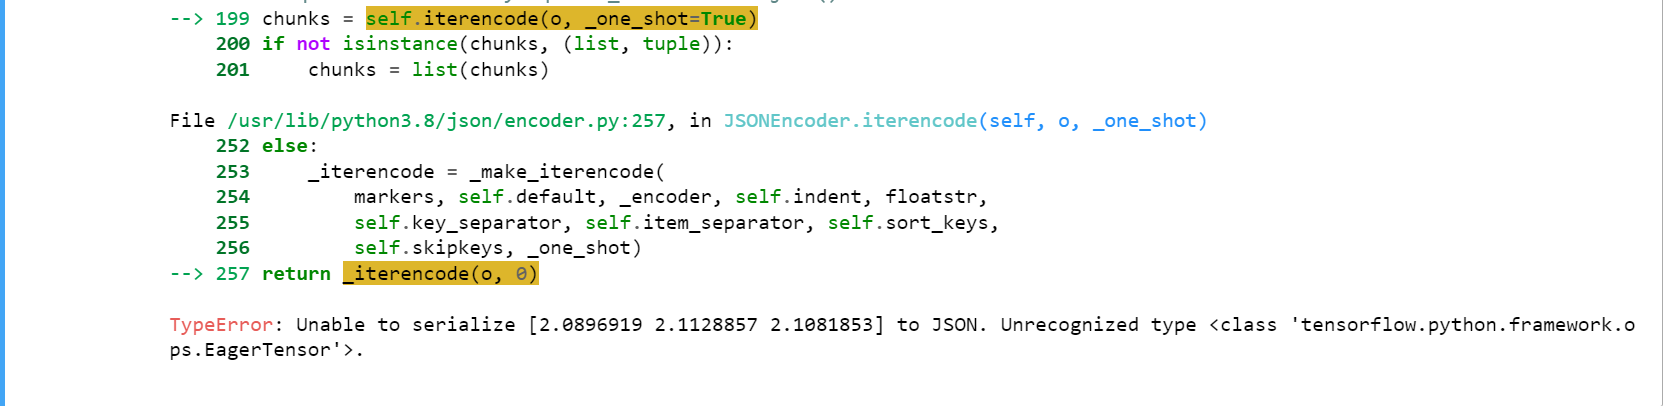

In [12]:
class CustomLearningRateScheduler(tf.keras.callbacks.Callback):
    def __init__(self, factor, patience, min_lr):
        super(CustomLearningRateScheduler, self).__init__()
        self.factor = factor
        self.patience = patience
        self.min_lr = min_lr
        self.wait = 0
        self.best_val_loss = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        
        # print('\rlr_logs: ', logs, '\r')
        print("\rwait: ", self.wait, "\r")
        print("\rCurrent lr:", tf.keras.backend.get_value(self.model.optimizer.lr), "\r")
        
        current_val_loss = logs['val_loss'] 
        
        if current_val_loss < self.best_val_loss:
            self.best_val_loss = current_val_loss
            self.wait = 0
        else:
            self.wait += 1
            print("\rself.wait >= self.patience:", self.wait >= self.patience, "\r")
            if self.wait >= self.patience:
                old_lr = tf.keras.backend.get_value(self.model.optimizer.lr)
                new_lr = old_lr * self.factor
                
                print("\rnew_lr >= self.min_lr:", new_lr >= self.min_lr, "\r")
                if new_lr >= self.min_lr:
                    print(f'\rEpoch {epoch+1}: Learning rate reduced to {new_lr} \r')
                    tf.keras.backend.set_value(self.model.optimizer.lr, new_lr) 
                else:
                    print(f'\rEpoch {epoch+1}: Minimum learning rate reached\r')
                self.wait = 0
                
lr_callback = CustomLearningRateScheduler(factor=0.1, 
                                          patience=3,
                                          min_lr=1e-7) 

In [13]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor="loss",
                                               patience=4, # Number of epochs with no improvement after which training will be stopped.
                                               start_from_epoch=1,
                                               mode="min") # training will stop when the quantity monitored has stopped decreasing

In [14]:
class ModelCheckpointCustom(tf.keras.callbacks.Callback):
    
    def __init__(self, model_path, save_best_only=False):
        super(ModelCheckpointCustom, self).__init__()
         
        self.model_path = model_path
        self.save_best_only = save_best_only
        self.best_val_loss = float('inf') 

    def on_epoch_end(self, epoch, logs=None):
        
        print('\rlogs: ', logs, '\r')
        
        current_val_loss = 0 if logs['val_loss'] is None else logs['val_loss']
        
        print('\rcurrent_val_loss: ', current_val_loss, '\r')
        print('\rsave_best_only: ', self.save_best_only, '\r')
        print('\rbest_val_loss: ', self.best_val_loss, '\r')
        print('\rcurrent_val_loss < best_val_loss: ', current_val_loss < self.best_val_loss, '\r') 
        
        if self.save_best_only and current_val_loss < self.best_val_loss:
            print('\rSaving weights at (save_best_only=True): ', self.model_path, '\r')
            self.best_val_loss = current_val_loss 
            self.model.save_weights(self.model_path)
            print("\rModel has been saved!")
        else:
            print('\rSaving weights at (save_best_only=False): ', self.model_path, '\r')
            self.model.save_weights(self.model_path) 
            print("\rModel has been saved!")

save_callbacks = ModelCheckpointCustom(model_path='checkpoint/model-basic/', save_best_only=True)

## <font color='red'>Now let's proceed with training the model.</font>

In [ ]:
history_basic = model_basic.fit(train,
                              epochs=100,
                              validation_data=test,
                              validation_steps=len(test) * 0.25,
                              callbacks=[save_callbacks, lr_callback, es_callback])

Epoch 1/100
  31/2368 [..............................] - ETA: 12:28 - loss: 3.6649 - accuracy: 0.2137

## <font color='red'>Now, let's analyze our model.</font>

    However, when using this approach, it is important to note that the model needs to be loaded first, and it must be an exact match in terms of parameters and configurations. Otherwise, errors may occur when trying to load the weights.
    
    Since there are limitations in training a large amount of data in Jupyter, I have provided a separate Python code for training the model with the same architecture and parameters as described here. You can find the Python code attached in the repository.

In [16]:
!ls checkpoint/model-basic/

checkpoint


In [17]:
load_model_basic = create_model()

In [18]:
load_model_basic.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 g_avg_pool (GlobalAveragePo  (None, 1280)             0         
 oling2D)                                                        
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 activation_1 (Activation)   (None, 101)               0         
                                                           

In [19]:
load_model_basic.load_weights("checkpoint/model-basic/")

In [34]:
pred = load_model_basic.evaluate(test)
print("Testing accuracy: ", pred[1])

790/790 [==============================] - 24s 30ms/step - loss: 1.2559 - accuracy: 0.7073
Testing accuracy:  0.7073267102241516


In [26]:
def conf_matrix(y_test=None, y_pred=None, class_names=None):
    
    cm = confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(12, 12))
    a = ax.matshow(cm, cmap=plt.cm.Greens)  
    
    fig.colorbar(a)  
    
    ax.set(title="Confusion Matrix",
             xlabel="Predicted label",
             ylabel="Actual label",
             xticks=np.arange(len(class_names)), 
             yticks=np.arange(len(class_names)), 
             xticklabels=class_names,  
             yticklabels=class_names)
    
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    plt.xticks(rotation=60, fontsize=4)
    plt.yticks(fontsize=5)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]}",
                  horizontalalignment="center", color="black" if cm[i, j] < (cm.max() + cm.min()) / 2 else "white",
                  fontsize=3)

In [84]:
y_pred = []
y_truth = []

In [94]:
for x, y in test:
    y_pred.extend(load_model_basic.predict([x], verbose=0).argmax(axis=1))
    y_truth.extend(y.numpy())

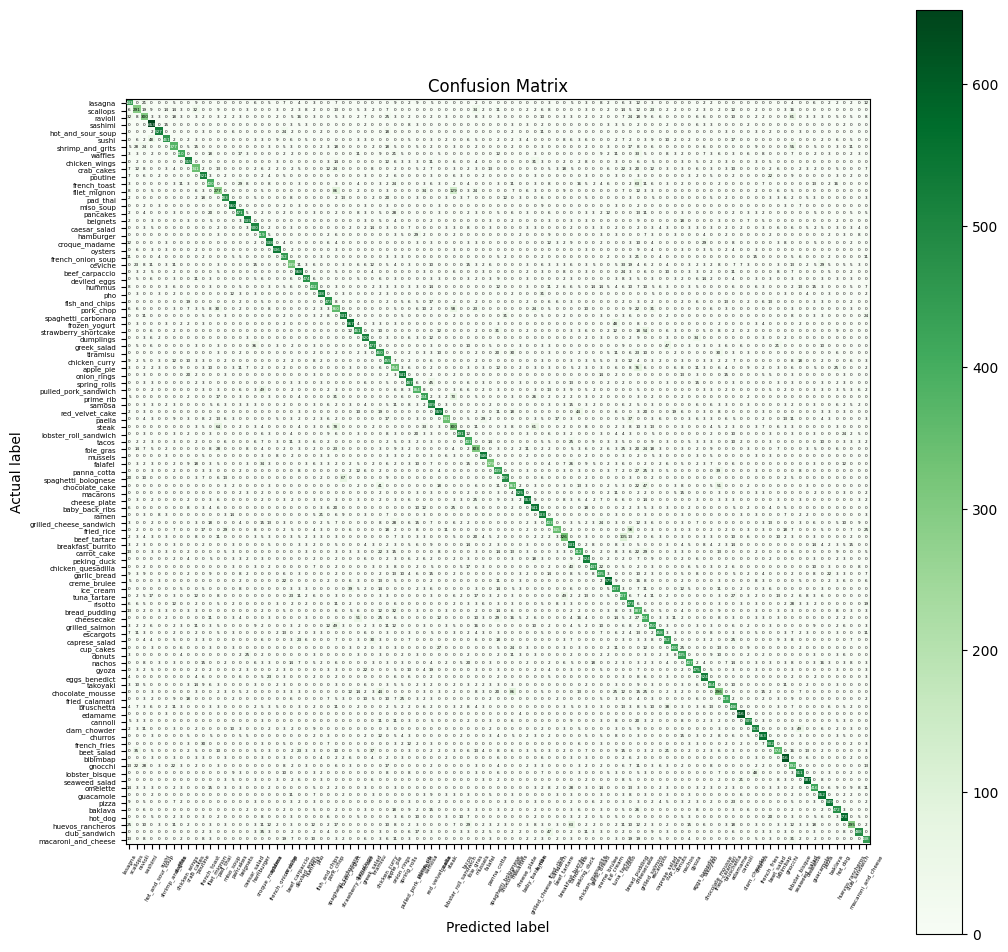

In [95]:
conf_matrix(y_test=y_truth, y_pred=y_pred, class_names=CLASS_NAMES)

## <font color='red'>With a simple and basic architecture, this model can achieve an accuracy of up to 70 percent.</font>

# You're welcome! I hope you found this information useful and learned something new from it. 🔥🔥🔥🔥🔥🔥🔥🔥🔥